In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

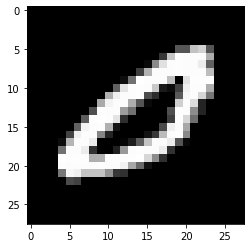

0


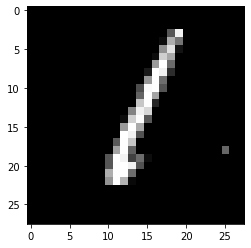

1


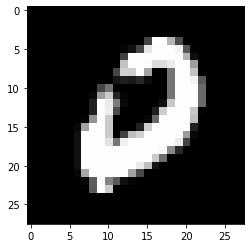

0


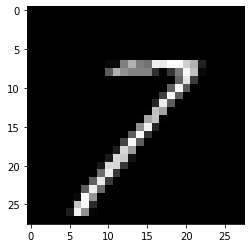

7


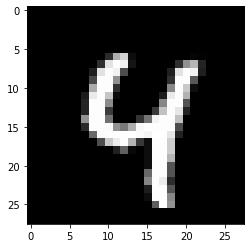

4


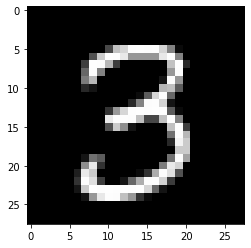

3


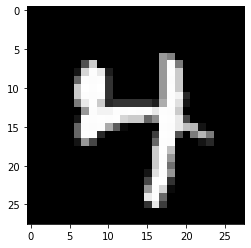

4


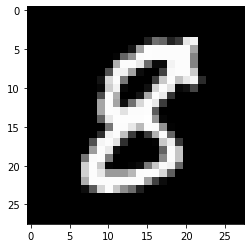

8


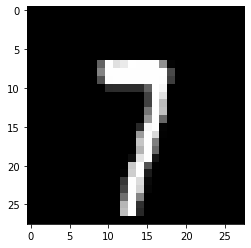

7


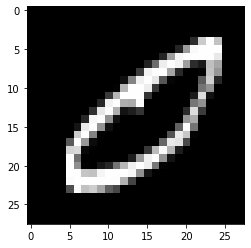

0


In [3]:
for idx in np.random.choice(train_images.shape[0], 10, replace=False):
    plt.imshow(train_images[idx], cmap="gray")
    plt.show()
    print(train_labels[idx])

5


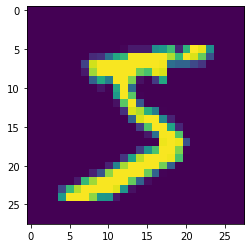

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

In [4]:
print(train_labels[0])
plt.imshow(train_images[0])
plt.show()
for row in train_images[0]:
    print("".join(map(lambda d: f"{d: >4}", row)))

In [5]:
train_images_normalized = np.float32(train_images.reshape(*train_images.shape, 1)) / 255
test_images_normalized = np.float32(test_images.reshape(*test_images.shape, 1)) / 255

In [6]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [7]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer=SGD(0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [8]:
model.fit(
    train_images_normalized,
    train_labels_encoded,
    batch_size=32,
    epochs=10,
    validation_data=(test_images_normalized, test_labels_encoded)
)
model.save("mnist_simple.h5")

Epoch 1/10
1875/1875 [==============================] - 69s 37ms/step - loss: 1.0222 - accuracy: 0.6723 - val_loss: 0.2112 - val_accuracy: 0.9370
Epoch 2/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3225 - accuracy: 0.9026 - val_loss: 0.1437 - val_accuracy: 0.9579
Epoch 3/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2427 - accuracy: 0.9276 - val_loss: 0.1150 - val_accuracy: 0.9643
Epoch 4/10
1875/1875 [==============================] - 70s 38ms/step - loss: 0.1979 - accuracy: 0.9416 - val_loss: 0.0883 - val_accuracy: 0.9718
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1687 - accuracy: 0.9503 - val_loss: 0.0777 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1344 - accuracy: 0.9592 - val_loss: 0.0659 - val_accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1152 - accuracy: 0.9649 - val_loss: 0.0550 -

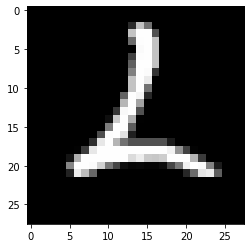

2 2


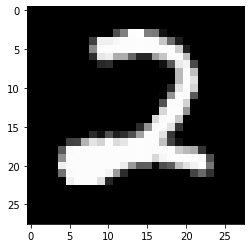

2 2


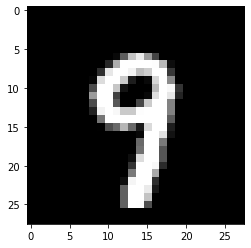

9 9


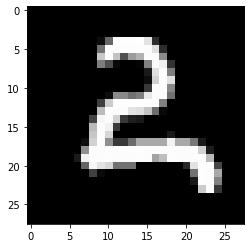

2 2


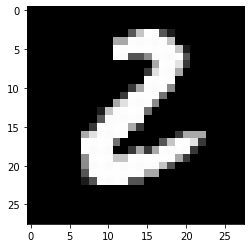

2 2


In [9]:
classifier = load_model("mnist_simple.h5")

for idx in np.random.choice(test_images_normalized.shape[0], 5, replace=False):
    plt.imshow(test_images_normalized[idx], cmap="gray")
    plt.show()
    print(
        test_labels[idx],
        np.squeeze(np.argmax(model.predict(test_images_normalized[idx].reshape(1, 28, 28, 1)), axis=1), axis=0)
    )

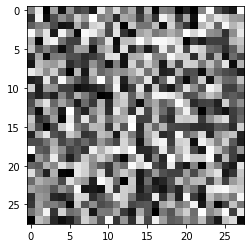

8


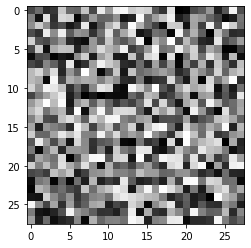

8


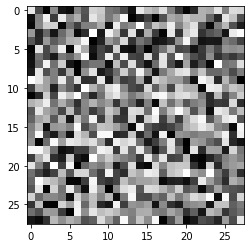

8


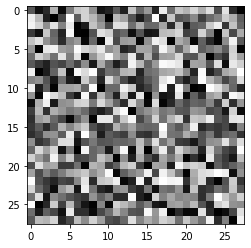

8


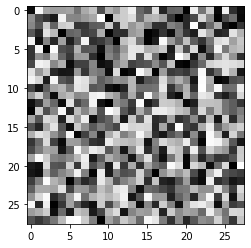

8


In [10]:
for idx in range(5):
    random_image = np.random.randint(0, 255, (28, 28, 1)).astype('float32') / 255
    plt.imshow(random_image, cmap="gray")
    plt.show()
    print(
        np.squeeze(np.argmax(model.predict(random_image.reshape(1, 28, 28, 1)), axis=1), axis=0)
    )